# Exploratory Data Analysis on EV Charging
#### Author: Yuxuan Chen
#### Date: 04/28/2024

## Introduction
This analysis focuses on exploring the patterns of electric vehicle (EV) charging data to understand usage trends and identify factors that influence energy consumption. By analyzing the temporal distribution of meter readings, we aim to discern when and how users interact with charging stations. This insight is crucial for optimizing energy resource management and preparing for peak demand times.

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr

## Basic Information

In [147]:
charging_data = pd.read_csv('meter_reading.csv')
print(charging_data.dtypes)
print(charging_data.info())
charging_data.describe()

Start Time             object
Meter Start (Wh)        int64
Meter End(Wh)         float64
Meter Total(Wh)       float64
Total Duration (s)      int64
Charger_name           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Start Time          277 non-null    object 
 1   Meter Start (Wh)    277 non-null    int64  
 2   Meter End(Wh)       277 non-null    float64
 3   Meter Total(Wh)     277 non-null    float64
 4   Total Duration (s)  277 non-null    int64  
 5   Charger_name        264 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 13.1+ KB
None


,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s)
count,2.770000e+02,2.770000e+02,277.000000,2.770000e+02
mean,3.968875e+05,4.030848e+05,6197.316318,9.651005e+04
std,3.912772e+05,3.892371e+05,12260.182878,3.472706e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,6.900900e+04,7.866592e+04,0.000000,1.200000e+01
50%,1.932000e+05,2.007288e+05,1380.280000,5.704000e+03
75%,7.430480e+05,7.508278e+05,6822.500000,7.343900e+04
max,1.204911e+06,1.204935e+06,126350.920000,3.020411e+06


After looking at the brief information and structure of dataset. The dataset consists of 277 entries across four primary features. Notably, the 'charger_name' column contains 13 null values. Given that these null entries constitute only a small fraction of the dataset, we have decided to drop these rows for the purposes of further analysis. Additionally, the 'start time' column is currently formatted as an object type; we plan to convert this to a time series type to facilitate more precise temporal analysis.

In [148]:
charging_data = charging_data.dropna()
charging_data['Start Time'] = pd.to_datetime(charging_data['Start Time'], format='%d.%m.%Y %H:%M')
charging_data.info()
charging_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 9 to 276
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Start Time          264 non-null    datetime64[ns]
 1   Meter Start (Wh)    264 non-null    int64         
 2   Meter End(Wh)       264 non-null    float64       
 3   Meter Total(Wh)     264 non-null    float64       
 4   Total Duration (s)  264 non-null    int64         
 5   Charger_name        264 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 14.4+ KB


,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s)
count,2.640000e+02,2.640000e+02,264.000000,2.640000e+02
mean,4.142639e+05,4.206191e+05,6355.157538,9.341541e+04
std,3.912358e+05,3.889345e+05,12429.480078,3.353374e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,8.107250e+04,9.921000e+04,0.000000,0.000000e+00
50%,2.073220e+05,2.239153e+05,1682.860000,7.003500e+03
75%,7.532460e+05,7.532460e+05,6860.370000,7.392875e+04
max,1.204911e+06,1.204935e+06,126350.920000,3.020411e+06


In [149]:
calculated_total_meter = charging_data['Meter End(Wh)'] - charging_data['Meter Start (Wh)']
check_total_meter = charging_data['Meter Total(Wh)'] == calculated_total_meter
equality_check = check_total_meter.value_counts()
equality_check_summary


True    264
Name: Check Equality, dtype: int64

Upon reviewing the dataset for any typographical errors or inconsistencies, we confirmed that there are no errors present. Everything appears to be in order, allowing us to proceed with the analysis without concerns about data accuracy or integrity.

In [150]:
correlation, _ = pearsonr(charging_data['Total Duration (s)'], charging_data['Meter Total(Wh)'])
print(f'The Pearson correlation coefficient between total duration and total meter readings is: {correlation:.2f}')

The Pearson correlation coefficient between total duration and total meter readings is: 0.03


A Pearson correlation coefficient of 0.03 indicates a very weak positive linear relationship between the two variables. In practical terms, this means that there is essentially no meaningful linear correlation between total duration and total meter readings. Changes in one variable do not predict changes in the other in a significant way.

## Investigating key features
Next, we choose to plot the distribution of key variables incluing total meter, total duration. We want to know how the data looks like visaully.

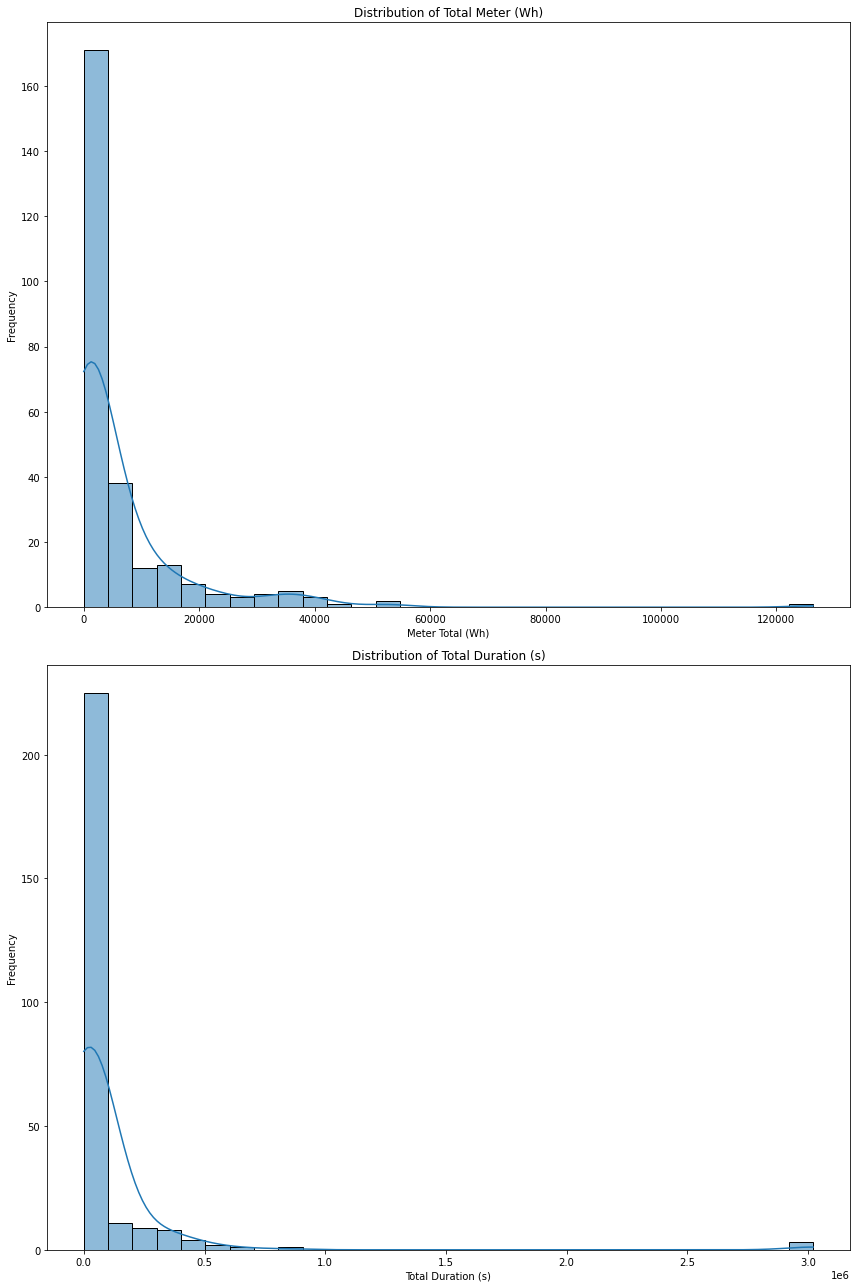

In [151]:
fig, axs = plt.subplots(2, 1, figsize=(12, 18))

sns.histplot(charging_data['Meter Total(Wh)'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Total Meter (Wh)')
axs[0].set_xlabel('Meter Total (Wh)')
axs[0].set_ylabel('Frequency')

sns.histplot(charging_data['Total Duration (s)'], bins=30, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Total Duration (s)')
axs[1].set_xlabel('Total Duration (s)')
axs[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()


After reviewing the graphs, we've noticed an unusual number of zeros in both the total meter and total duration graphs, which is irregular. One possible explanation for both the total duration and meter total being zero is that there was no charging activity and the charger was not used. However, if situations arise where the total meter is not zero but the total duration is—or vice versa—it could indicate serious issues. For example, this could suggest potential energy theft at the charger station or a malfunction in the time tracking system. Let's investigate further to confirm these suspicions.

## Anomalous Detection

In [152]:
anomalous_cases_1 = charging_data[(charging_data['Total Duration (s)'] == 0) & (charging_data['Meter Total(Wh)'] > 0)]
anomalous_cases_2 = charging_data[(charging_data['Meter Total(Wh)'] == 0) & (charging_data['Total Duration (s)'] > 0)]
anomalous = pd.concat([anomalous_cases_1,anomalous_cases_2],ignore_index= True)
anomalous

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name
0,2018-08-29 08:01:00,1546,2290.81,744.81,0,charger_3
1,2018-08-29 08:19:00,2433,2447.41,14.41,0,charger_3
2,2018-08-29 13:25:00,2441,18233.89,15792.89,0,charger_3
3,2018-09-06 07:27:00,5709,11062.20,5353.20,0,charger_2
4,2018-09-06 09:15:00,28619,31060.46,2441.46,0,charger_3
5,2018-12-19 10:55:00,622842,626820.04,3978.04,0,charger_5
6,2019-04-02 09:48:00,726247,727279.73,1032.73,0,charger_4
7,2019-04-04 10:27:00,675539,675826.10,287.10,0,charger_8
8,2019-01-28 01:11:00,873775,875702.62,1927.62,0,charger_4
9,2019-05-02 11:24:00,876263,876299.00,36.00,0,charger_4


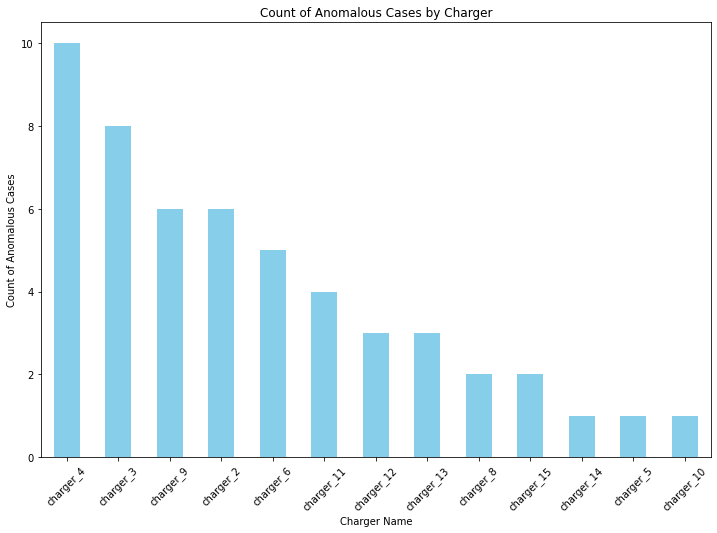

In [153]:
charger_counts = anomalous['Charger_name'].value_counts()
plt.figure(figsize=(12, 8))
charger_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Anomalous Cases by Charger')
plt.xlabel('Charger Name')
plt.ylabel('Count of Anomalous Cases')
plt.xticks(rotation=45)
plt.show()


After extracting all the data samples with zeros in either the meter total or total duration, we found that 57 entries exhibit this issue. Moreover, among the 15 chargers, 13 have reported such discrepancies. Notably, Charger 4 has the highest number of these cases. If these anomalies aren't due to typos or operational errors, the charger company should be notified to investigate the matter further. This could help in identifying any underlying issues with the equipment or possible misuse.

In [154]:
condition = (charging_data['Total Duration (s)'] == 0) & (charging_data['Meter Total(Wh)'] > 0)
condition_2 = (charging_data['Total Duration (s)'] >0) & (charging_data['Meter Total(Wh)'] == 0)
charging_data = charging_data.drop(charging_data[condition].index)
charging_data = charging_data.drop(charging_data[condition_2].index)

correlation, _ = pearsonr(charging_data['Total Duration (s)'], charging_data['Meter Total(Wh)'])
print(f'The Pearson correlation coefficient between total duration and total meter readings is: {correlation:.2f}')

The Pearson correlation coefficient between total duration and total meter readings is: 0.04


<ipython-input-154-2339a68eca91>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  charging_data = charging_data.drop(charging_data[condition_2].index)


Dropping the anomalous data from charging_data and then recalculating the Pearson correlation coefficient, which increased slightly to 0.04, does indicate a marginal improvement in the correlation between total duration and total meter readings. However, as you noted, this correlation remains very weak.

## Meter Total by week, day, hour

Next, we want to delve into the relationship between energy consumption and time, we'll visualize the distribution of total meter readings across different time segments: weekly, daily, and hourly. By plotting these distributions, we aim to uncover any recurring patterns. These could manifest as particular days of the week with higher usage, daily peaks and troughs, or specific hours that consistently show increased activity. Such insights could be pivotal in optimizing energy management and anticipating demand.

Text(0, 0.5, 'Total Meter (Wh)')

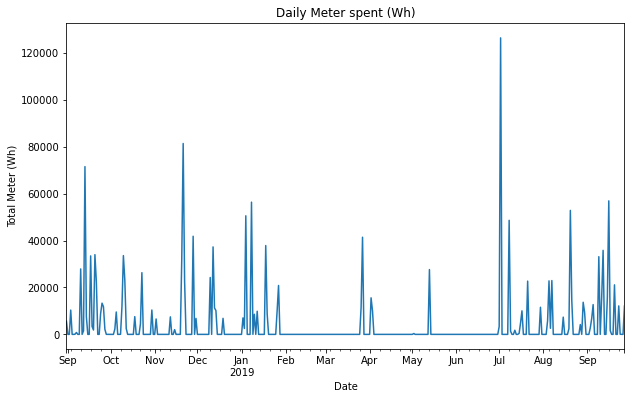

In [155]:
plt.figure(figsize=(10, 6))
charging_data.set_index('Start Time', inplace=True)
charging_data['Meter Total(Wh)'].resample('D').sum().plot()
plt.title('Daily Meter spent (Wh)')
plt.xlabel('Date')
plt.ylabel('Total Meter (Wh)')

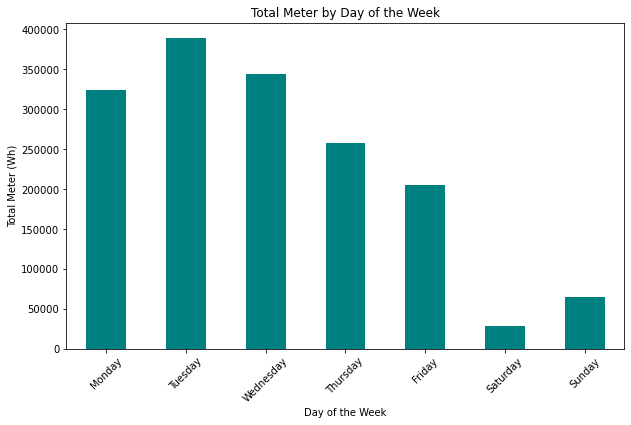

In [156]:
charging_data.reset_index(inplace=True)
charging_data['Day of Week'] = charging_data['Start Time'].dt.day_name()

weekly_energy = charging_data.groupby('Day of Week')['Meter Total(Wh)'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 6))
weekly_energy.plot(kind='bar', color='teal')
plt.title('Total Meter by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Meter (Wh)')
plt.xticks(rotation=45)
plt.show()



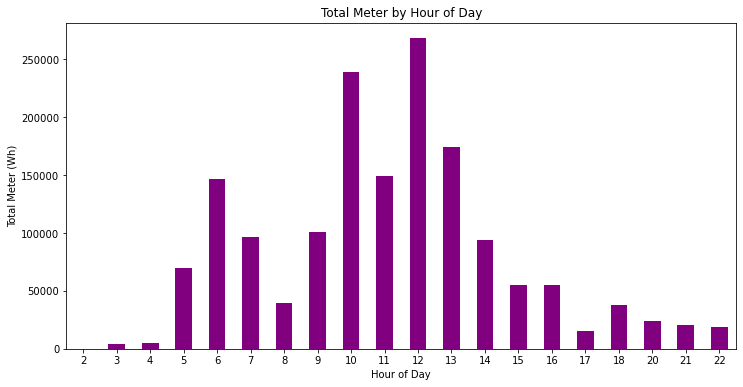

In [157]:
charging_data['Hour of Day'] = charging_data['Start Time'].dt.hour
hourly_total_energy = charging_data.groupby('Hour of Day')['Meter Total(Wh)'].sum()

plt.figure(figsize=(12, 6))
hourly_total_energy.plot(kind='bar', color='purple')
plt.title('Total Meter by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Meter (Wh)')
plt.xticks(rotation=0)
plt.show()


The plots reveal that energy consumption reaches its peak during midday on weekdays, suggesting a surge in usage as activities ramp up. Conversely, the lowest levels of consumption occur around midnight on weekends, which could reflect a significant drop in demand when most activities wind down. These findings highlight key periods of high and low energy usage that could inform strategies for managing load and efficiency.

## Summary

The investigation commenced with a diligent data preparation phase, where we addressed missing values and reformatted the 'Start Time' column to enable precise time series analysis. Our exploratory data analysis (EDA) yielded critical insights into the charging habits over different time scales, shedding light on daily and hourly consumption peaks and troughs.

During the EDA, we encountered an array of anomalous data points characterized by discrepancies in the duration and energy meter readings. Specifically, instances were found where charging sessions had significant energy consumption recorded but zero duration logged, and vice versa. This raised concerns over potential underlying issues such as system malfunctions or unauthorized energy usage, which could lead to operational inefficiencies or revenue losses.

After cleaning the dataset of these anomalies, we re-evaluated the correlation between the total charging duration and energy consumed, which remained notably weak. This suggested that the charging duration is not a sole predictor of energy usage, indicating the influence of other, possibly more complex, factors at play.

The analysis culminated in the visualization of energy consumption patterns, revealing a peak in usage around noon on weekdays, juxtaposing with the lowest usage around midnight during weekends. Such patterns point towards a workweek-centric charging behavior.

The discovery of anomalous data is a critical finding, emphasizing the need for the charging company to implement stringent monitoring systems and potentially revise their operational protocols. Addressing these issues is not only crucial for maintaining the reliability and accuracy of the charging service but also for safeguarding against energy theft and ensuring the integrity of usage data for future analyses.